In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def kde(X, bandwidth):
    
    def gaussian_kernel(u):
        
        return np.exp(-0.5 * u ** 2) / np.sqrt(2 * np.pi)
    
    nh = len(X) * bandwidth
    
    def pdf(x):
        # for each sample x in X you create a normal pdf (if using gaussian kernel)
        # centered at x, the pdf is then sum of all the n normal pdfs at that point
        return (1 / nh) * np.sum(gaussian_kernel((x - X) / bandwidth))
    
    return np.vectorize(pdf)

In [6]:
np.random.seed(0)
X = np.concatenate([np.random.randn(400) - 2, np.random.randn(400) / 0.5 + 3])

In [7]:
bandwidths = [0.1, 0.5, 1.0, 2.0]
pdfs = [kde(X, h) for h in bandwidths]
x_ = np.arange(-5, 10, 0.01)

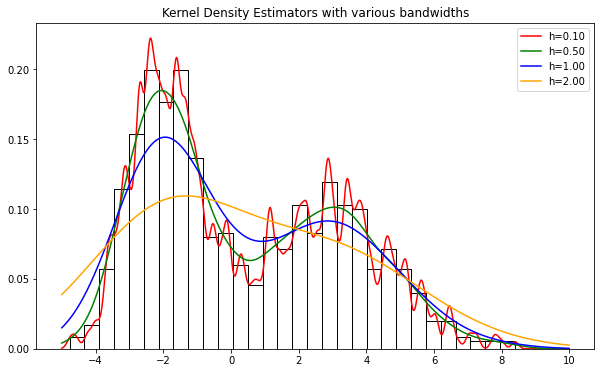

In [10]:
plt.subplots(1, 1, figsize=(10, 6))

plt.hist(X,
         bins=30,
         edgecolor='black',
         density=True,
         fc=(0, 0, 0, 0))

for pdf, h, c in zip(pdfs, bandwidths, ['r', 'g', 'b', 'orange']):
    plt.plot(x_, pdf(x_), c, label=f'h={h:.2f}')

plt.legend()
plt.title('Kernel Density Estimators with various bandwidths')
plt.show()